## Web Scraping with API Integration:

In [6]:
import requests
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"

response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched the webpage")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")
    exit()

dfs = pd.read_html(response.text)

print(f"Number of tables found: {len(dfs)}")

df = dfs[0]

print(df.head())

df.to_csv('countries_population.csv', index=False)
print("Data saved to 'countries_population.csv'")


Successfully fetched the webpage
Number of tables found: 2
         Country  Population (1 July 2022)  Population (1 July 2023)  Change  \
0          World                8021407192                8091734930  +0.88%   
1          India                1425423212                1438069596  +0.89%   
2       China[a]                1425179569                1422584933  −0.18%   
3  United States                 341534046                 343477335  +0.57%   
4      Indonesia                 278830529                 281190067  +0.85%   

  UN Continental Region[1] UN Statistical Subregion[1]  
0                      NaN                         NaN  
1                     Asia               Southern Asia  
2                     Asia                Eastern Asia  
3                 Americas            Northern America  
4                     Asia          South-eastern Asia  
Data saved to 'countries_population.csv'


## Data Cleaning and Analysis:

In [7]:
df = pd.read_csv('countries_population.csv')
df.head()

,Country,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,World,8021407192,8091734930,+0.88%,NaN,NaN
1,India,1425423212,1438069596,+0.89%,Asia,Southern Asia
2,China[a],1425179569,1422584933,−0.18%,Asia,Eastern Asia
3,United States,341534046,343477335,+0.57%,Americas,Northern America
4,Indonesia,278830529,281190067,+0.85%,Asia,South-eastern Asia


In [9]:
df.shape

(238, 6)

In [8]:
df.isna().sum()

Country                        0
Population (1 July 2022)       0
Population (1 July 2023)       0
Change                         0
UN Continental Region[1]       1
UN Statistical Subregion[1]    1
dtype: int64

In [14]:
df[df['UN Continental Region[1]'].isna()]

,Country,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,World,8021407192,8091734930,+0.88%,NaN,NaN


There is no need to remove it

In [17]:
df.duplicated().sum()

0

## Data Visualization

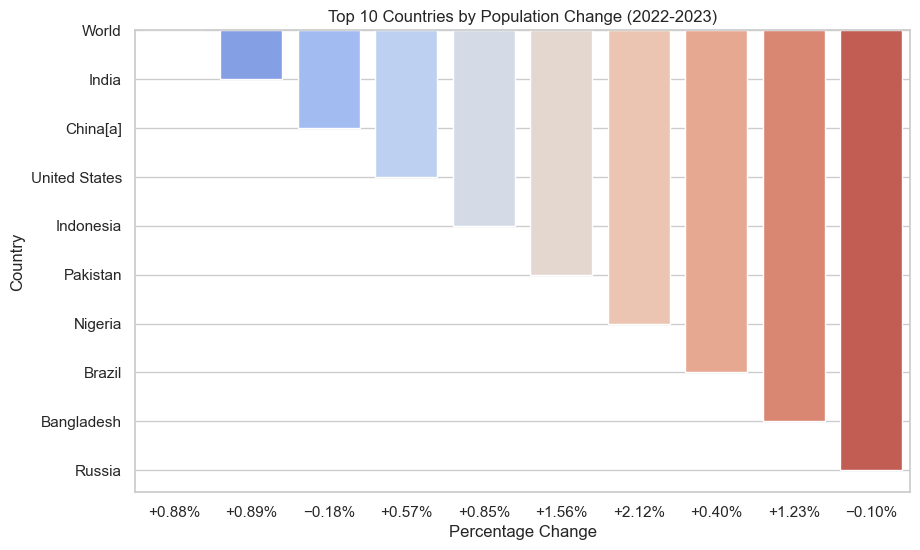

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x="Change", y="Country", data=df.head(10), palette="coolwarm")
plt.title("Top 10 Countries by Population Change (2022-2023)")
plt.xlabel("Percentage Change")
plt.ylabel("Country")
plt.show()

df.to_csv('cleaned_population_data.csv', index=False)

## Comparison of Tools and Techniques:

### BeautifulSoup

- **Performance**: Suitable for small to medium-sized static websites. Slower for large datasets.
- **Ease of Use**: Very simple, ideal for beginners with an easy-to-understand API.
- **Handling Dynamic Content**: Poor, not suitable for JavaScript-rendered websites.
- **Best For**: Static HTML pages or websites with minimal dynamic content.

### Scrapy

- **Performance**: High, designed for large-scale scraping with support for concurrent requests.
- **Ease of Use**: Moderate, requires some learning but offers great flexibility.
- **Handling Dynamic Content**: Can handle AJAX but not fully JavaScript-rendered content.
- **Best For**: Large-scale scraping projects where speed and efficiency are crucial.

### Selenium

- **Performance**: Slow, as it renders full web pages and simulates a browser.
- **Ease of Use**: Moderate, requires setup with browser drivers.
- **Handling Dynamic Content**: Excellent for JavaScript-heavy sites, can handle complex interactions.
- **Best For**: Websites with complex JavaScript and user interactions.
